In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
X = pd.read_csv("xdata.csv", header= None)
y = pd.read_csv("ydata.csv", header= None)

In [0]:
X.head()

,0,1,2
0,0,3.482106,2.420392
1,1,3.516279,3.719750
2,2,4.606496,3.414379
3,3,4.677011,3.047244
4,4,4.157725,3.138677


In [0]:
y.head()

,0,1
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


In [0]:
# droping index
X.drop([0], inplace= True, axis = 1)
y.drop([0], inplace= True, axis = 1)

In [0]:
X.columns = ["x1", 'x2']
X.head()

,x1,x2
0,3.482106,2.420392
1,3.516279,3.719750
2,4.606496,3.414379
3,4.677011,3.047244
4,4.157725,3.138677


In [0]:
y.columns = ['y']
y.head()

,y
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [0]:
y[1].unique()

array([0., 1.])

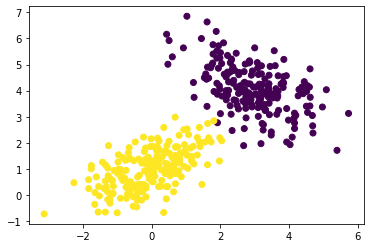

In [0]:
plt.scatter(X['x1'], X['x2'], c = y['y'])
# plt.scatter(3.482106, 2.420392, c = 'r')
plt.show()

In [0]:
X.shape, y.shape

((400, 2), (400, 1))

In [0]:
X = X.values
y = y.values
X.shape, y.shape

((400, 2), (400, 1))

## KNN Code

In [0]:
def KNN(X, y, testing_point, k = 7):
    
    # Step 1
    Val = []
    for i in range(X.shape[0]) :
        dis = np.sqrt(sum((X[i]-testing_point)**2))
        Val.append([dis, y[i]])

    # Step 2
    Val = sorted(Val)

    # Step 3
    Vals = Val[:k]
    Vals = np.array(Vals)

    # Step 4
    new_vals = np.unique(Vals[:, 1], return_counts= True)
    index = np.argmax(new_vals[1])

    # Step 5
    prediction = new_vals[0][index]

    return prediction

### Explain

In [0]:
# a = np.array([1,2,4])
b = np.array([2,3])

np.sqrt(sum((X[10]-b)**2)), y[10]

(1.9388451872263994, array([0.]))

In [0]:
a = [[2,0],[1,2], [5,0], [3,2], [4,2]]
a

[[2, 0], [1, 2], [5, 0], [3, 2], [4, 2]]

In [0]:
a = sorted(a)
a

[[1, 2], [2, 0], [3, 2], [4, 2], [5, 0]]

In [0]:
b = np.array(a[:3])
print(b)
print("dis --> ", end = "")
print(b[:, 0])
print("tar --> ", end = "")
print(b[:, 1])

[[1 2]
 [2 0]
 [3 2]]
dis --> [1 2 3]
tar --> [2 0 2]


In [0]:
c = np.unique(b[:, 1], return_counts= True)
c

(array([0, 2]), array([1, 2]))

In [0]:
c[0], c[1]

(array([0, 2]), array([1, 2]))

In [0]:
idx = np.argmax(c[1])
idx

1

In [0]:
c[0][idx]

2

## Cont.

In [0]:
testing_point = np.array([0,0])
KNN(X, y, testing_point, k = 7)

array([1.])

In [0]:
random_testing = np.array([3, 2])
pred = KNN(X, y, random_testing, k = 7)
pred

array([0.])

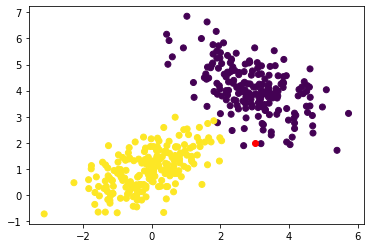

In [0]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.scatter(random_testing[0], random_testing[1], c= 'r')
plt.show()